In [302]:
#Imports
import os
from google.colab import drive
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix


In [247]:
#Connect to Google Drive
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive')
print("Change successful.")

Mounted at /content/drive
Change successful.


In [248]:
data = pd.read_csv("Dataset.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [249]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [250]:
#There are 240 duplicated rows
data.duplicated().sum()

240

In [251]:
#Drop duplicated rows
data = data.drop_duplicates()
data.duplicated().sum()

0

## Exploratory Data Analysis

In [252]:
print("Rows: ",data.shape[0])
print("Columns: ",data.shape[1])

Rows:  1359
Columns:  12


In [253]:
X = data.drop('quality',axis=1)
y = data[['quality']]

print(X.columns)
print(y.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['quality'], dtype='object')


In [254]:
#All columns are numeric
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [255]:
#Note the huge change in values for the following columns:
'''
1. 75%-100% for free sulphur dioxide
2. 75%-100% for residual sugar
3. 
'''
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [256]:
#citric acid content, sulphate content, alcohol content have maximum influence on the quality
correlation  = data.corr()
correlation['quality']

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

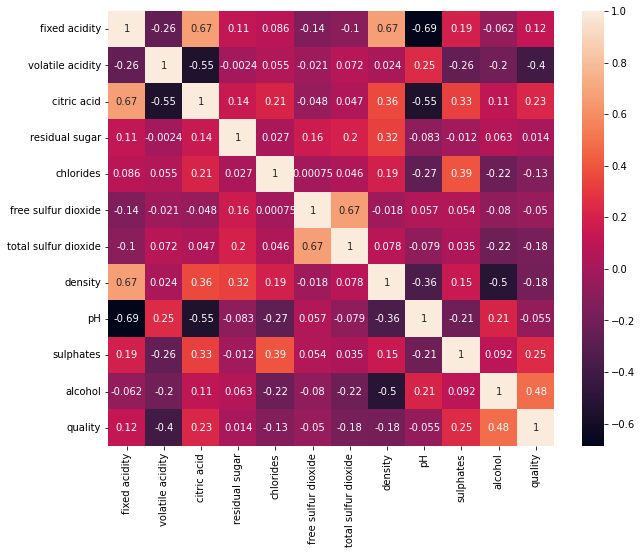

In [257]:
#generate correlation plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)

In [258]:
#Attributes vs. Quality
def influence(param):
  plt.figure(figsize=(7,7))
  x = data['quality']
  y = data[param]
  plt.bar(x,y)
  plt.xlabel("Quality")
  plt.ylabel(param)
  plt.show()

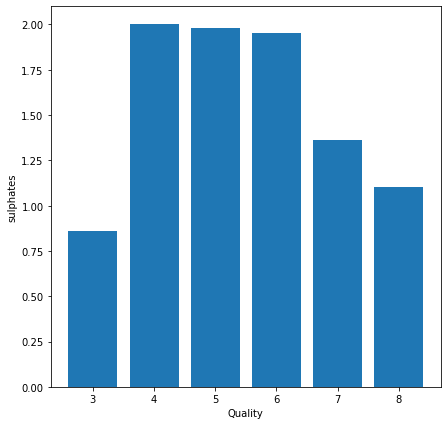

In [259]:
#Wine having an average quality has high sulphate content
#High & Low quality wine have low sulphate content
influence("sulphates")

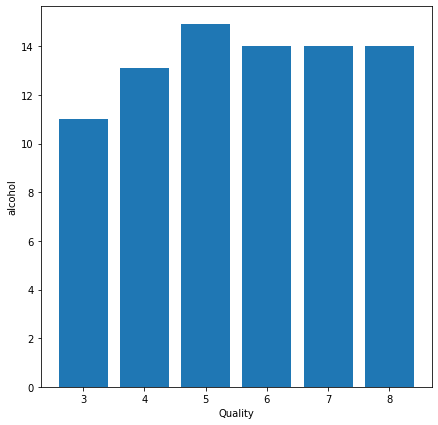

In [260]:
#Almost all kinds of wine expect those that are very poorly rated have a high alcohol content
influence("alcohol")

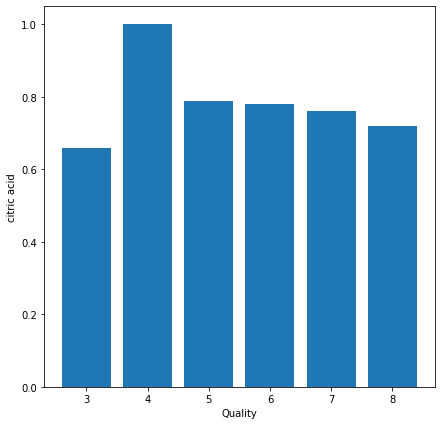

In [261]:
#Wine of quality 4 has a very high citric acid content, others have nearly the same quality
influence("citric acid")

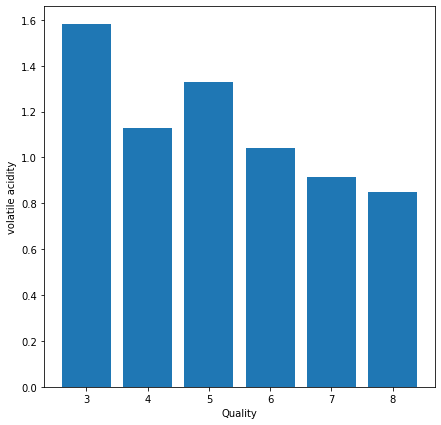

In [262]:
#Wines of higher quality have less volatile acidity
influence("volatile acidity")

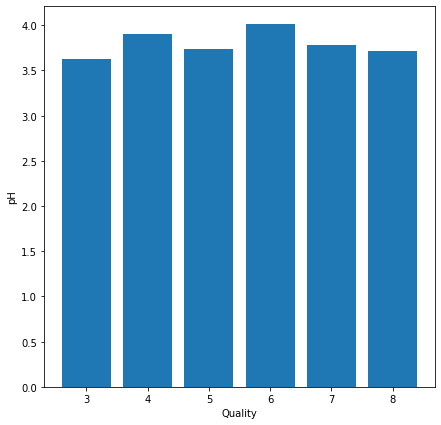

In [263]:
#All wines have nearly the same pH - this column can be dropped
influence("pH")

In [264]:
data = data.drop(['pH'],axis=1)
data.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5


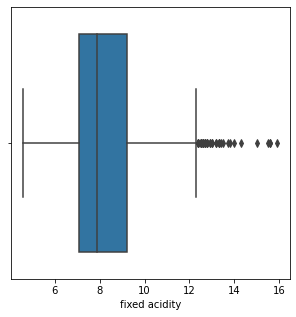

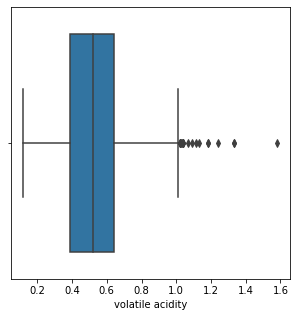

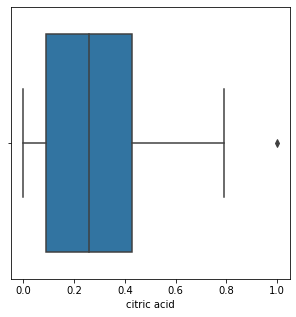

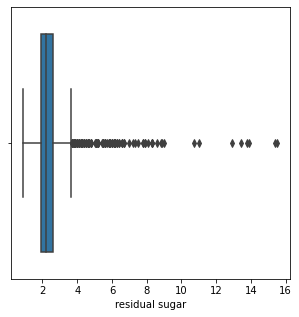

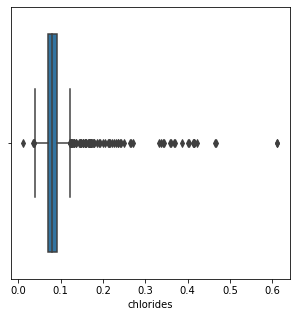

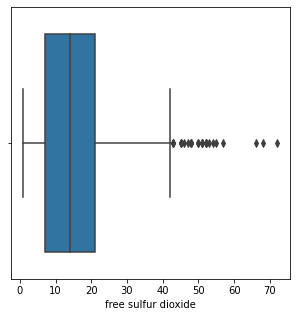

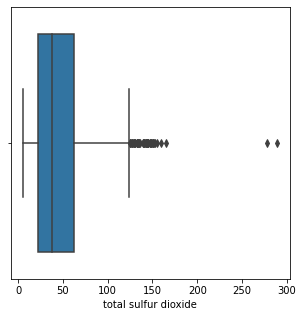

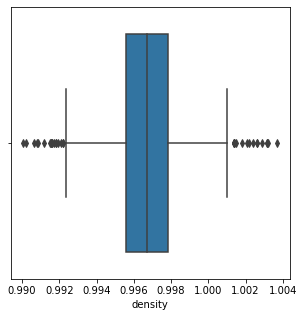

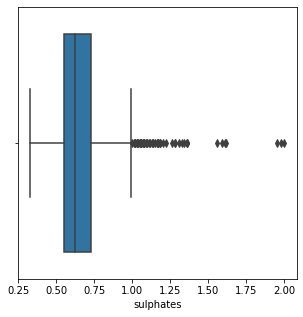

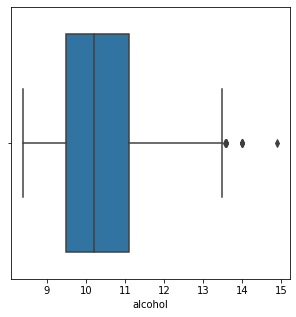

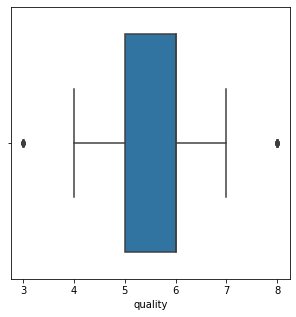

In [265]:
#Check for outliers
for col in data.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=col,data=data)
    plt.show()

In [266]:
#Remove outliers
#z = np.abs(zscore(data))
#z.max()

In [267]:
#data = data[(z<3).all(axis=1)]
#data.shape

## Model Training

In [285]:
def fun(y_value):
  if y_value<=4:
    return 0
  elif y_value<=6:
    return 1
  else:
     return 2

In [288]:
X = data.drop('quality', axis = 1)
y = data['quality'].apply(fun)
print(y)

0       1
1       1
2       1
3       1
5       1
       ..
1593    1
1594    1
1595    1
1597    1
1598    1
Name: quality, Length: 1359, dtype: int64


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [290]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Decision Tree

In [291]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [292]:
y_predict = dt.predict(X_test)

In [293]:
print(accuracy_score(y_test,y_predict))

0.8272058823529411


### Random Forest

In [294]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [295]:
y_predict = dt.predict(X_test)

In [296]:
print(accuracy_score(y_test,y_predict))

0.8272058823529411


### K-Nearest Neighbors

In [299]:
knn = KNeighborsClassifier(metric = 'minkowski', weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [300]:
y_predict = knn.predict(X_test)

In [301]:
print(accuracy_score(y_test,y_predict))

0.8419117647058824


### Support Vector Machine Classifier

In [303]:
svc = SVC(kernel='rbf', gamma=1, C=2)
svc.fit(X_train, y_train)

SVC(C=2, gamma=1)

In [304]:
y_predict = svc.predict(X_test)

In [305]:
print(accuracy_score(y_test,y_predict))

0.8455882352941176
